In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import SpectralClustering
from sklearn.neighbors import kneighbors_graph
from matplotlib.colors import ListedColormap

# Set the style for visualization
plt.style.use('dark_background')

In [2]:
# 1. Data Generation
# -----------------
# Generate the two moons dataset with controlled noise level
X, labels = make_moons(
    n_samples=200,  # Number of points in the dataset
    noise=0.1,      # Level of Gaussian noise
    random_state=47 
)

In [3]:
# 2. Model Configuration
# ---------------------
# Initialize Spectral Clustering with specific parameters
spectral = SpectralClustering(
    n_clusters=2,        # Number of clusters to find
    affinity='rbf',      # Radial Basis Function kernel
    n_neighbors=100,     # Number of neighbors for the kernel
    assign_labels='kmeans', # Method for final clustering step
    random_state=47      
)

In [4]:
# 3. Model Fitting and Prediction
# ------------------------------
predicted_labels = spectral.fit_predict(X)

In [5]:
# 4. Label Alignment
# -----------------
def simple_align_labels(y_true, y_pred):
    """
    Align cluster labels with true labels for
    Binary Clustering.
    
    Parameters:
    -----------
    y_true : array-like
        True labels
    y_pred : array-like
        Predicted cluster labels
        
    Returns:
    --------
    array-like
        Aligned predicted labels
    """
    accuracy = np.mean(y_true == y_pred)
    if accuracy < 0.5:
        return 1 - y_pred  # Flip labels if below 50%
    return y_pred

In [6]:
# Align the predicted labels with true labels
predicted_labels = simple_align_labels(labels, predicted_labels)

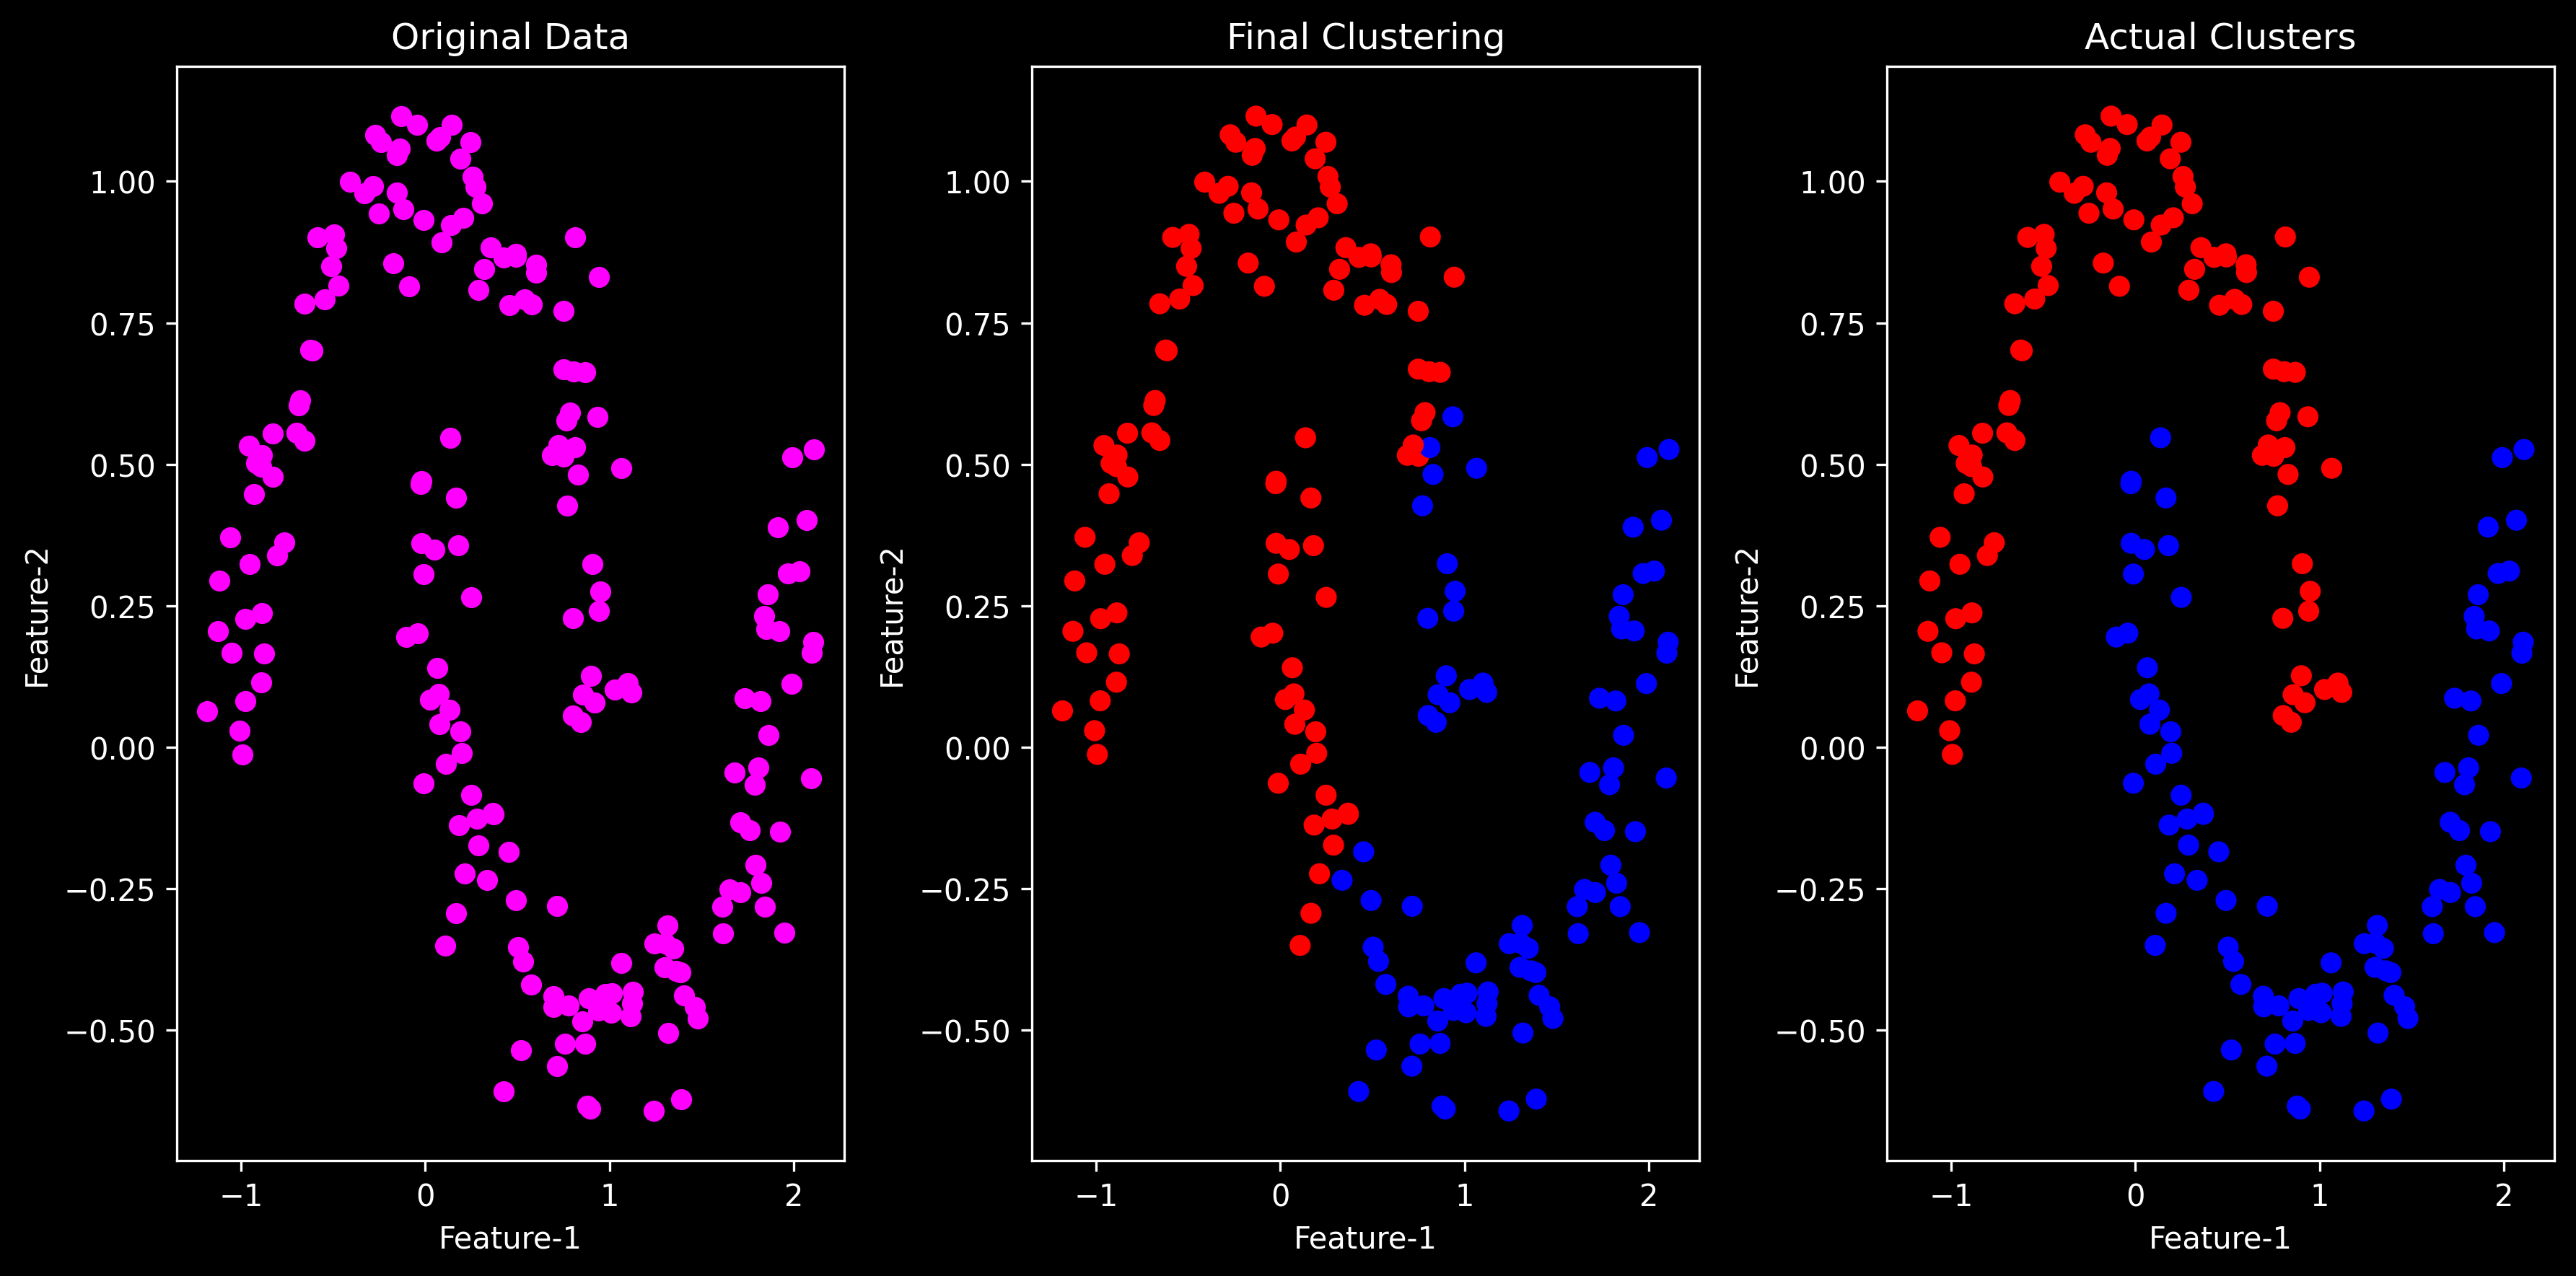

In [7]:
# 5. Visualization
# ---------------
# Create a figure with three subplots
plt.figure(figsize=(12, 6), dpi=300)

# 5.1 Original Data
plt.subplot(131)
plt.scatter(X[:, 0], X[:, 1], c='magenta', alpha=1.0)
plt.title('Original Data')
plt.xlabel('Feature-1')
plt.ylabel('Feature-2')

# 5.2 Clustering Results
plt.subplot(132)
plt.scatter(X[:, 0], X[:, 1], 
           c=predicted_labels, 
           cmap=ListedColormap(['red', 'blue']))
plt.title('Final Clustering')
plt.xlabel('Feature-1')
plt.ylabel('Feature-2')

# 5.3 True Clusters
plt.subplot(133)
plt.scatter(X[:, 0], X[:, 1], 
           c=labels, 
           cmap=ListedColormap(['red', 'blue']))
plt.title('Actual Clusters')
plt.xlabel('Feature-1')
plt.ylabel('Feature-2')

# Adjust layout and display
plt.tight_layout()
plt.show()

In [8]:
# 6. Performance Evaluation
# ------------------------
accuracy = np.mean(labels == predicted_labels)
print(f"Clustering Accuracy: {accuracy:.3f}")

# Display cluster sizes
for i in range(2):
    print(f"Cluster {i} size: {np.sum(predicted_labels == i)}")

Clustering Accuracy: 0.770
Cluster 0 size: 112
Cluster 1 size: 88
